<a href="https://colab.research.google.com/github/Chrysanthemum-Leucanthemum/MAIR_23/blob/main/PRDL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Pattern Recognition & Deep Learning


Import modules

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

Mount data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load data

In [ ]:
mnist_data = pd.read_csv('/content/drive/MyDrive/PRDL - Project/mnist.csv')
mnist_data_vals = mnist_data.values

Print first image from dataset

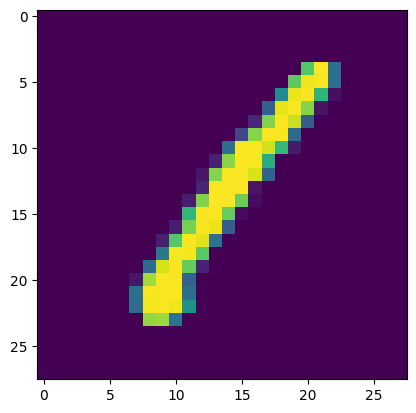

In [ ]:
labels = mnist_data_vals[:, 0]
digits = mnist_data_vals[:, 1:]
img_size = 28
plt.imshow(digits[0].reshape(img_size, img_size))
plt.show()

In [ ]:
print(mnist_data_vals)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


### 1. EDA

Describe the data using describe()


In [ ]:
data_describe = mnist_data.describe()
print(data_describe)
#Useless variables are the variables with the lowest variance (std)

# To set a threshold for the lowest variance, we need to know the mean of the std
mean_variance = data_describe.loc['std'].mean()
print(mean_variance)

# We set the threshold to 10% of the mean
variance_threshold = 0.1*mean_variance
cols = data_describe.columns[data_describe.loc['std'] < variance_threshold]
print(cols), print(len(cols))





              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

(None, None)

Checking and plotting the distribution

In [ ]:
class_distribution = mnist_data['label'].value_counts(normalize=True)
print(class_distribution)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64


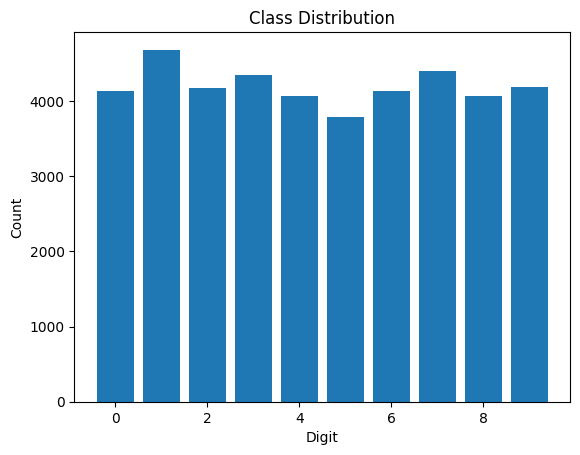

In [ ]:
# Plot class distribution

X = mnist_data.iloc[:,1:]
y = mnist_data.iloc[:,0]

plt.bar(np.unique(y), np.bincount(y))
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

Correctly predicting the majority class

In [ ]:
majority_class_percentage = class_distribution.max()
print(f"Percentage of cases classified correctly by predicting the majority class: {majority_class_percentage * 100}%")


Percentage of cases classified correctly by predicting the majority class: 11.152380952380952%


### 2. Ink ratio

In [ ]:
# create ink feature
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

In [ ]:
mnist_data['ink_feature'] = ink

In [ ]:
# The more the values are similar, the harder it is to distinguish between the digits

print(len(ink)), print(ink_mean), print(ink_std)

42000
[34632.40755082285, 15188.466268146884, 29871.099353603066, 28320.188002757986, 24232.72249508841, 25835.920421607378, 27734.917331399563, 22931.244262667577, 30184.148412503077, 24553.75]
[8461.892043158483, 4409.461697281539, 7653.006198983366, 7574.104535679545, 6374.633457092554, 7526.602988920305, 7530.503187255003, 6168.3408781754315, 7777.396357381105, 6465.231330430596]


(None, None, None)

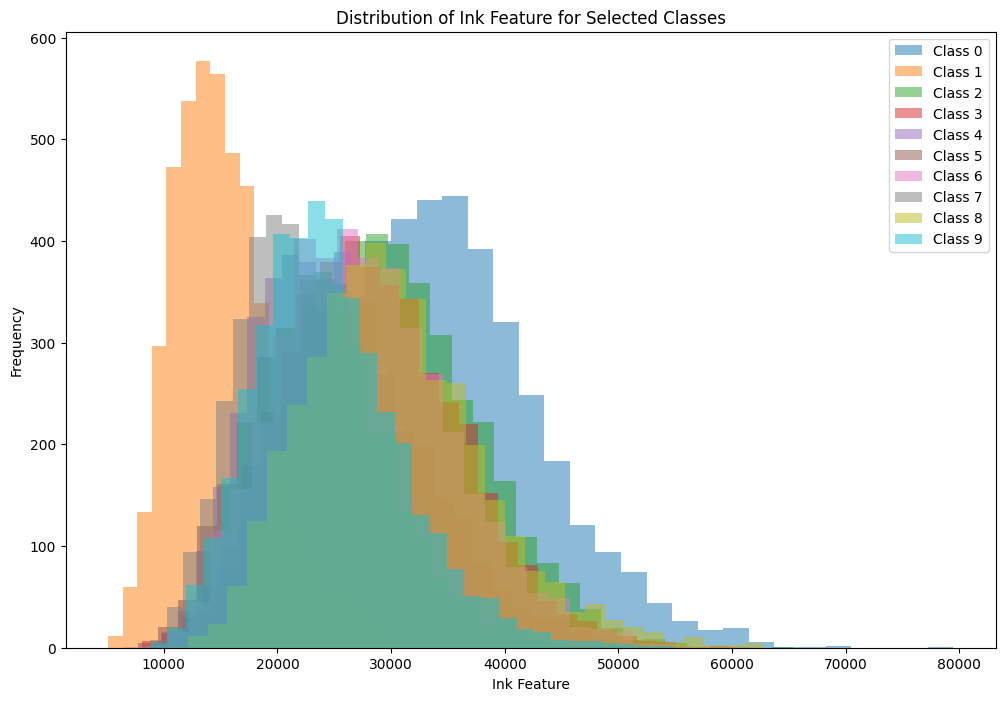

In [ ]:
import matplotlib.pyplot as plt

# Select a few classes for which you want to plot histograms
selected_classes = [0, 1, 2, 3,4,5,6,7,8,9]

# Plot histograms for each selected class
plt.figure(figsize=(12, 8))

for class_label in selected_classes:
    plt.hist(mnist_data[mnist_data['label'] == class_label]['ink_feature'], bins=30, alpha=0.5, label=f'Class {class_label}')

plt.title('Distribution of Ink Feature for Selected Classes')
plt.xlabel('Ink Feature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints)
plt.show()

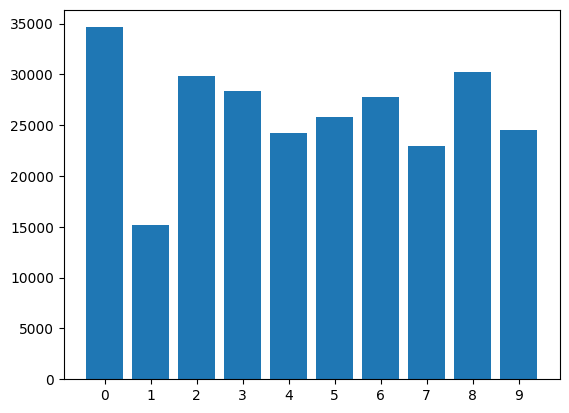

In [ ]:
import matplotlib.pyplot as plt


height_mean = ink_mean
bars = (0,1,2,3,4,5,6,7,8,9)
y_pos = np.arange(len(bars))


plt.bar(y_pos, height_mean)


plt.xticks(y_pos, bars)
plt.show()

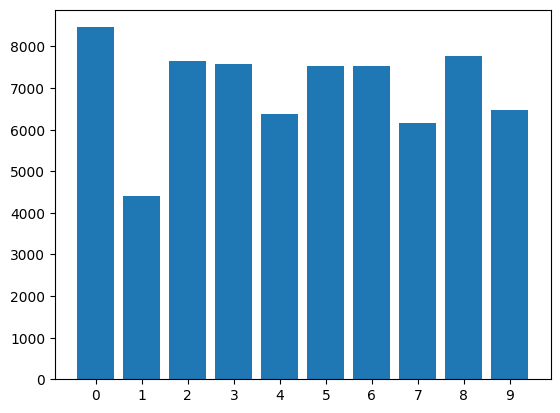

In [ ]:
import matplotlib.pyplot as plt


height_std = ink_std
bars = (0,1,2,3,4,5,6,7,8,9)
y_pos = np.arange(len(bars))


plt.bar(y_pos, height_std)


plt.xticks(y_pos, bars)
plt.show()

In [ ]:
X_mlm = scale(mnist_data['ink_feature']).reshape(-1,1)
clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,multi_class='multinomial').fit(X_mlm, y)

In [ ]:
print("training score : %.3f (%s)" % (clf.score(X_mlm, y), 'multinomial'))

training score : 0.227 (multinomial)


### Feature Aspect Ratio=(Width/Height)

In [ ]:
# create aspect-ratio feature


mnist_data_clean = mnist_data.iloc[:,1:-1]

mnist_data_clean_arr = np.array(mnist_data_clean)


In [ ]:
len(mnist_data_clean_arr[0])

784

In [ ]:
c = np.array([0,0,0,0,0,1,0,1,0,0,0,3,0,0,0,0])
print(len(c))

16


In [ ]:
v = np.array(np.array_split(c,4))

In [ ]:
v

array([[0, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [ ]:
def aspect_ratio(arr):
    height,width=[],[]
    arr = np.array(np.array_split(arr,28))
    for i in arr:
        w = np.where(i != 0)[0]
        if len(w)>0:
            width.append(w)
    for j in range(arr.shape[1]):
        h = np.where(arr[:,j] != 0)[0]
        if len(h)>0:
            height.append(h)

    width_high, width_low = width[-1], width[0]
    height_high, height_low = height[-1], height[0]

    if len(width_high)>1:
        width_high = width_high[-1]
    if len(height_high)>1:
        height_high = height_high[-1]
    if len(width_low)>1:
        width_low = width_low[0]
    if len(height_low)>1:
        height_low = height_low[0]
    if height_high - height_low == 0:
        aspect_ratio = 0
        return aspect_ratio
    else:
        aspect_ratio = (width_high - width_low)/(height_high - height_low)
        return aspect_ratio

ar = []
for p in mnist_data_clean_arr:
    t = aspect_ratio(p)
    ar.append(t)




In [ ]:
ar


[0.7142857142857143,
 2.6666666666666665,
 0.15789473684210525,
 0.7894736842105263,
 1.125,
 -1.0,
 -2.0,
 array([-1.125]),
 -0.25,
 -2.3333333333333335,
 -0.18181818181818182,
 2.0,
 -0.0,
 1.0,
 -1.5,
 0.2,
 0.6666666666666666,
 1.0,
 0.5,
 1.1,
 -0.08333333333333333,
 2.3333333333333335,
 0.06666666666666667,
 1.1666666666666667,
 0.7692307692307693,
 -0.4,
 0.8333333333333334,
 array([0.25]),
 0.0,
 2.75,
 0.3,
 0.5833333333333334,
 -0.5,
 -0.0,
 0.8571428571428571,
 0.3125,
 2.0,
 -1.0,
 0.3333333333333333,
 5.0,
 -0.09090909090909091,
 -0.3333333333333333,
 1.6,
 0.3333333333333333,
 1.4545454545454546,
 -0.2,
 -0.46153846153846156,
 1.5714285714285714,
 0.3125,
 0,
 array([8.]),
 1.1818181818181819,
 -0.09090909090909091,
 0.6875,
 -0.6666666666666666,
 4.5,
 0.8571428571428571,
 -2.6666666666666665,
 -2.5,
 0.125,
 array([4.5]),
 2.0,
 0.5,
 -2.0,
 0.8,
 0.38461538461538464,
 10.0,
 0.8571428571428571,
 0.26666666666666666,
 0.75,
 -0.0,
 0.0,
 1.5,
 -4.0,
 0.25,
 1.2857142857